### Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/My Drive/Colab Notebooks/dataset/Normal_Videos_for_Event_Recognition_Clipped_0_20.zip'
!unzip '/content/drive/My Drive/Colab Notebooks/dataset/anomaly_videos_Clipped.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/dataset/Normal_Videos_for_Event_Recognition_Clipped_0_20.zip
   creating: Normal_Videos_for_Event_Recognition_Clipped_0_20/
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_417_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_606_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_352_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_100_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_929_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_310_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_251_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_704_x264.mp4  
  inflating: Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_401_x264.mp4  
  infla

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from glob import glob
import os
import cv2

### Data Preparation

In [1]:
!rm -rf Normal_Videos_for_Event_Recognition_Clipped_0_20/frames
!rm -rf anomaly_videos_Clipped/frames

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [5]:
store_images = []
normal_images = []
anomaly_images = []

In [6]:
# config
IMG_SIZE = (227, 227)

In [7]:
def store_img_array(image_path, store_images):
    image = load_img(image_path)
    image = img_to_array(image)
    image = cv2.resize(image, IMG_SIZE, interpolation=cv2.INTER_AREA)
    gray = 0.2989 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]
    store_images.append(gray)

In [8]:
def store_tiff_array(tiff_path):
    store_images = []
    for image_path in tiff_path:
        image = load_img(image_path)
        image = img_to_array(image)
        image = cv2.resize(image, IMG_SIZE, interpolation=cv2.INTER_AREA)
        gray = 0.2989 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]
        store_images.append(gray)
    return store_images

#### Normal Event

In [9]:
n_data_path = 'Normal_Videos_for_Event_Recognition_Clipped_0_20'
n_video = glob(n_data_path + '/*.mp4')

In [10]:
n_frame_path = n_data_path + '/frames'
fps = 5

In [11]:
if not os.path.exists(n_frame_path):
    os.makedirs(n_frame_path)

In [12]:
n_video

['Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_913_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_345_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_360_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_246_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_597_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_247_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_310_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_905_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_365_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_885_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_453_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Clipped_0_20/Normal_Videos_892_x264.mp4',
 'Normal_Videos_for_Event_Recognition_Cl

In [13]:
len(n_video)

50

In [14]:
for video in n_video:
    if video != 'frames':
        v_folder = video.split('.')[0].split('/')[1]
        !eval mkdir $n_frame_path/$v_folder
        !eval ffmpeg -i $video -r $fps $n_frame_path/$v_folder/%04d.tif
        images = os.listdir(n_frame_path + '/' + v_folder)
        for image in images:
            image_path = n_frame_path + '/' + v_folder + '/' + image
            store_img_array(image_path, normal_images)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [15]:
np.array(normal_images).shape

(4771, 227, 227)

#### Anomaly Event

In [16]:
an_data_path = 'anomaly_videos_Clipped'
an_video = glob(an_data_path + '/*.mp4')

In [17]:
an_frame_path = an_data_path + '/frames'
fps = 5

In [18]:
if not os.path.exists(an_frame_path):
    os.makedirs(an_frame_path)

In [19]:
an_video

['anomaly_videos_Clipped/Explosion010_x264.mp4',
 'anomaly_videos_Clipped/2nd_Arson011_x264.mp4',
 'anomaly_videos_Clipped/2nd_Burglary037_x264.mp4',
 'anomaly_videos_Clipped/2nd_Burglary021_x264.mp4',
 'anomaly_videos_Clipped/Explosion007_x264.mp4',
 'anomaly_videos_Clipped/Arson011_x264.mp4',
 'anomaly_videos_Clipped/Abuse030_x264.mp4',
 'anomaly_videos_Clipped/Arson007_x264.mp4',
 'anomaly_videos_Clipped/Arrest024_x264.mp4',
 'anomaly_videos_Clipped/Fighting047_x264.mp4',
 'anomaly_videos_Clipped/Burglary021_x264.mp4',
 'anomaly_videos_Clipped/Fighting003_x264.mp4',
 'anomaly_videos_Clipped/Abuse028_x264.mp4',
 'anomaly_videos_Clipped/Burglary037_x264.mp4',
 'anomaly_videos_Clipped/Arrest030_x264.mp4',
 'anomaly_videos_Clipped/Assault011_x264.mp4',
 'anomaly_videos_Clipped/Assault006_x264.mp4']

In [20]:
len(an_video)

17

In [21]:
for video in an_video:
    if video != 'frames':
        v_folder = video.split('.')[0].split('/')[1]
        !eval mkdir $an_frame_path/$v_folder
        !eval ffmpeg -i $video -r $fps $an_frame_path/$v_folder/%04d.tif
        images = os.listdir(an_frame_path + '/' + v_folder)
        for image in images:
            image_path = an_frame_path + '/' + v_folder + '/' + image
            store_img_array(image_path, anomaly_images)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [22]:
np.array(anomaly_images).shape

(3724, 227, 227)

####Avenue Dataset

In [ ]:
!rm -rf Avenue_Dataset/training_videos/frames

In [ ]:
train_path = 'Avenue_Dataset/training_videos'
fps = 5

train_videos = os.listdir(train_path)
train_images_path = train_path + '/frames'
os.makedirs(train_images_path)

FileNotFoundError: ignored

In [ ]:
for video in train_videos:
    if video != 'frames':
        v_folder = video.split('.')[0]
        !eval mkdir $train_path/frames/$v_folder
        !eval ffmpeg -i $train_path/$video -r 1/$fps $train_path/frames/$v_folder/%04d.tif
        images = os.listdir(train_images_path + '/' + v_folder)
        for image in images:
            image_path = train_images_path + '/' + v_folder + '/' + image
            store_img_array(image_path)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

#### UCSD Dataset

In [ ]:
t_data_path = 'UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train'
tiff_files = glob(t_data_path + '/*/*.tif')

In [ ]:
store_tiff = store_tiff_array(tiff_files)

In [ ]:
print(np.array(store_tiff).shape)
print(np.array(store_images).shape)

(6800, 227, 227)
(150, 227, 227)


###Append and save training numpy data

In [23]:
y_normal = np.zeros(np.array(normal_images).shape[0])
y_anomaly = np.ones(np.array(anomaly_images).shape[0])
print(f'y_normal shape: {y_normal.shape}')
print(f'y_anomaly shape: {y_anomaly.shape}')

y_normal shape: (4771,)
y_anomaly shape: (3724,)


In [24]:
store_images = np.append(normal_images, anomaly_images, axis=0)
store_images.shape

(8495, 227, 227)

In [25]:
target = np.append(y_normal, y_anomaly)
target.shape

(8495,)

In [26]:
# store_images = np.array(store_images)
a, b, c = store_images.shape

store_images.resize(b, c, a)
store_images = (store_images - store_images.mean()) / (store_images.std())
store_images = np.clip(store_images, 0, 1)

np.save('training_data_all_event.npy', store_images)

In [27]:
np.save('training_data_all_target.npy', target)

### Build Model

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv3D, ConvLSTM2D, Conv3DTranspose, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [63]:
# Encoder
i = Input(shape=(227, 227, 5, 1))
x = Conv3D(128, kernel_size=(11, 11, 1), strides=(4, 4, 1), padding='valid', activation='tanh')(i)
x = Conv3D(64, kernel_size=(5, 5, 1), strides=(2, 2, 1), padding='valid', activation='tanh')(x)
x = ConvLSTM2D(64, kernel_size=(3, 3), strides=1, padding='same', dropout=0.4, recurrent_dropout=0.3, return_sequences=True)(x)

# Z
x = ConvLSTM2D(32, kernel_size=(3, 3), strides=1, padding='same', dropout=0.3, return_sequences=True)(x)

# Decoder
x = ConvLSTM2D(64, kernel_size=(3, 3), strides=1, padding='same', dropout=0.5, recurrent_dropout=0.3, return_sequences=True)(x)
x = Conv3DTranspose(128, kernel_size=(5, 5, 1), strides=(2, 2, 1), padding='valid', activation='tanh')(x)
x = Conv3DTranspose(1, kernel_size=(11, 11, 1), strides=(4, 4, 1), padding='valid', activation='tanh')(x)

# classifier
x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

In [64]:
model = Model(i, x)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 227, 227, 5, 1)]  0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 55, 55, 5, 128)    15616     
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 26, 26, 5, 64)     204864    
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, 26, 26, 5, 64)     295168    
_________________________________________________________________
conv_lst_m2d_7 (ConvLSTM2D)  (None, 26, 26, 5, 32)     110720    
_________________________________________________________________
conv_lst_m2d_8 (ConvLSTM2D)  (None, 26, 26, 5, 64)     221440    
_________________________________________________________________
conv3d_transpose (Conv3DTran (None, 55, 55, 5, 128)   

In [65]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

### Train Model

In [41]:
training_data = np.load('training_data_all_event.npy')
target_data = np.load('training_data_all_target.npy')

frames = training_data.shape[2]
print(f'Frames: {frames}')
frames = frames - frames%5
print(f'Frames train: {frames}')

training_data = training_data[:, :, :frames]
target_data = np.array([target_data[i] for i in range(0, len(target_data), 5)])
print(f'Training data shape: {training_data.shape}')
print(f'Target data shape: {target_data.shape}')

training_data = training_data.reshape(-1, 227, 227, 5)
print(f'Training data 2 shape: {training_data.shape}')

training_data = np.expand_dims(training_data, axis=4)
print(f'Training data 3 shape: {training_data.shape}')

Frames: 8495
Frames train: 8495
Training data shape: (227, 227, 8495)
Target data shape: (1699,)
Training data 2 shape: (1699, 227, 227, 5)
Training data 3 shape: (1699, 227, 227, 5, 1)


In [46]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, y_train, y_val = train_test_split(training_data, target_data, shuffle=True)
print(f'X_train.shape: {X_train.shape}')
print(f'X_val.shape: {X_val.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_val.shape: {y_val.shape}')
print()
print(f'y_train.unique: {np.unique(y_train, return_counts=True)}')
print(f'y_val.unique: {np.unique(y_val, return_counts=True)}')

X_train.shape: (1274, 227, 227, 5, 1)
X_val.shape: (425, 227, 227, 5, 1)
y_train.shape: (1274,)
y_val.shape: (425,)

y_train.unique: (array([0., 1.]), array([708, 566]))
y_val.unique: (array([0., 1.]), array([247, 178]))


In [ ]:
# training_data = np.load('training_data_all_event.npy')
# frames = training_data.shape[2]
# print(f'Frames: {frames}')
# frames = frames - frames%10
# print(f'Frames train: {frames}')

# val_size = 0.3
# val_frames = (1.0-val_size) * frames
# val_frames -= val_frames%10
# val_frames = int(val_frames)
# print(f'Val frames: {val_frames}')

# validation_data = training_data[:, :, val_frames:frames]
# print(f'Validation data shape: {validation_data.shape}')
# training_data = training_data[:, :, :val_frames]
# print(f'Training data shape: {training_data.shape}')

# training_data = training_data.reshape(-1, 227, 227, 10)
# print(f'Training data 2 shape: {training_data.shape}')
# validation_data = validation_data.reshape(-1, 227, 227, 10)
# print(f'Validation data 2 shape: {validation_data.shape}')

# training_data = np.expand_dims(training_data, axis=4)
# print(f'Training data 3 shape: {training_data.shape}')
# validation_data = np.expand_dims(validation_data, axis=4)
# print(f'Validation data 3 shape: {validation_data.shape}')

# training_target = training_data.copy()
# validation_target = validation_data.copy()

Frames: 9448
Frames train: 9440
Val frames: 6600
Validation data shape: (227, 227, 2840)
Training data shape: (227, 227, 6600)
Training data 2 shape: (660, 227, 227, 10)
Validation data 2 shape: (284, 227, 227, 10)
Training data 3 shape: (660, 227, 227, 10, 1)
Validation data 3 shape: (284, 227, 227, 10, 1)


In [ ]:
# print(training_data.shape)
# print(validation_data.shape)

(660, 227, 227, 10, 1)
(284, 227, 227, 10, 1)


In [66]:
epochs = 20
batch_size = 16
callback_save = ModelCheckpoint('csae_model_class.h5', monitor='val_loss', save_best_only=True)
callback_early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [67]:
r = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[callback_save, callback_early_stopping])

Epoch 1/20
80/80 [==============================] - 55s 686ms/step - loss: 0.4401 - accuracy: 0.5557 - val_loss: 0.4188 - val_accuracy: 0.5812
Epoch 2/20
80/80 [==============================] - 51s 636ms/step - loss: 0.4443 - accuracy: 0.5557 - val_loss: 0.4188 - val_accuracy: 0.5812
Epoch 3/20
 8/80 [==>...........................] - ETA: 42s - loss: 0.4688 - accuracy: 0.5312

KeyboardInterrupt: ignored

### Model Evaluation

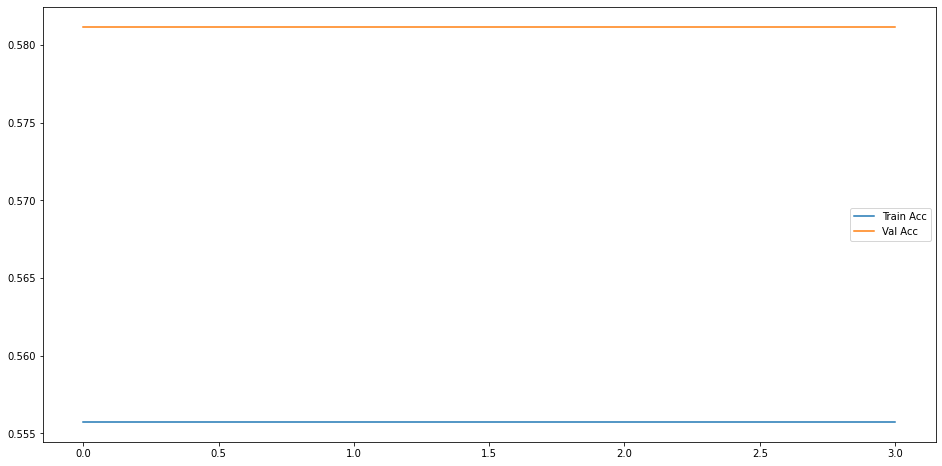

In [57]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

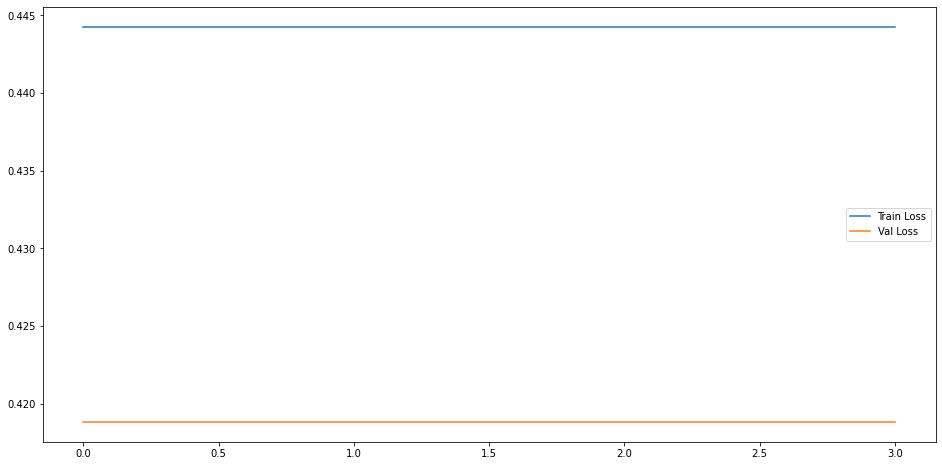

In [58]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
y_val_pred = np.round(model.predict(X_val))

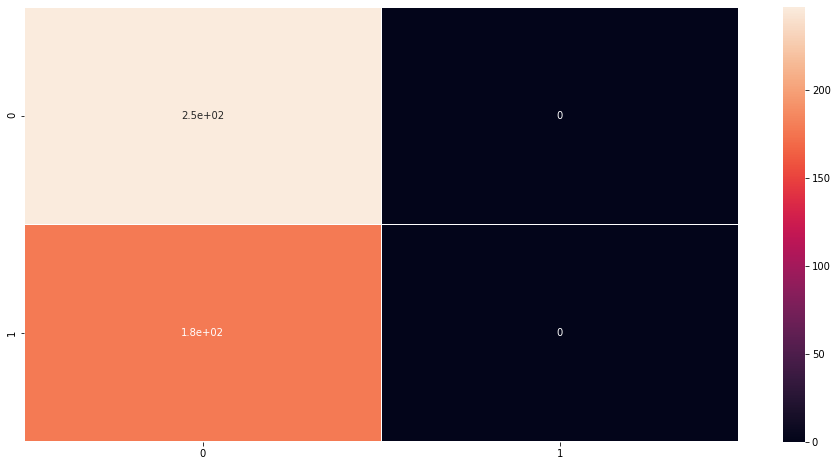

In [61]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, linewidths=0.5)
plt.show()

In [62]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74       247
         1.0       0.00      0.00      0.00       178

    accuracy                           0.58       425
   macro avg       0.29      0.50      0.37       425
weighted avg       0.34      0.58      0.43       425



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Save

In [ ]:
model.save('csae_model_class.h5')

In [ ]:
model.save_weights('csae_model_class_w.h5')

In [ ]:
from google.colab import files
files.download('csae_model_class.h5')
files.download('csae_model_class_w.h5')
# files.download('training_data.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Camera Capture
Using a webcam to capture images for processing on the runtime.

#### Capture Image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


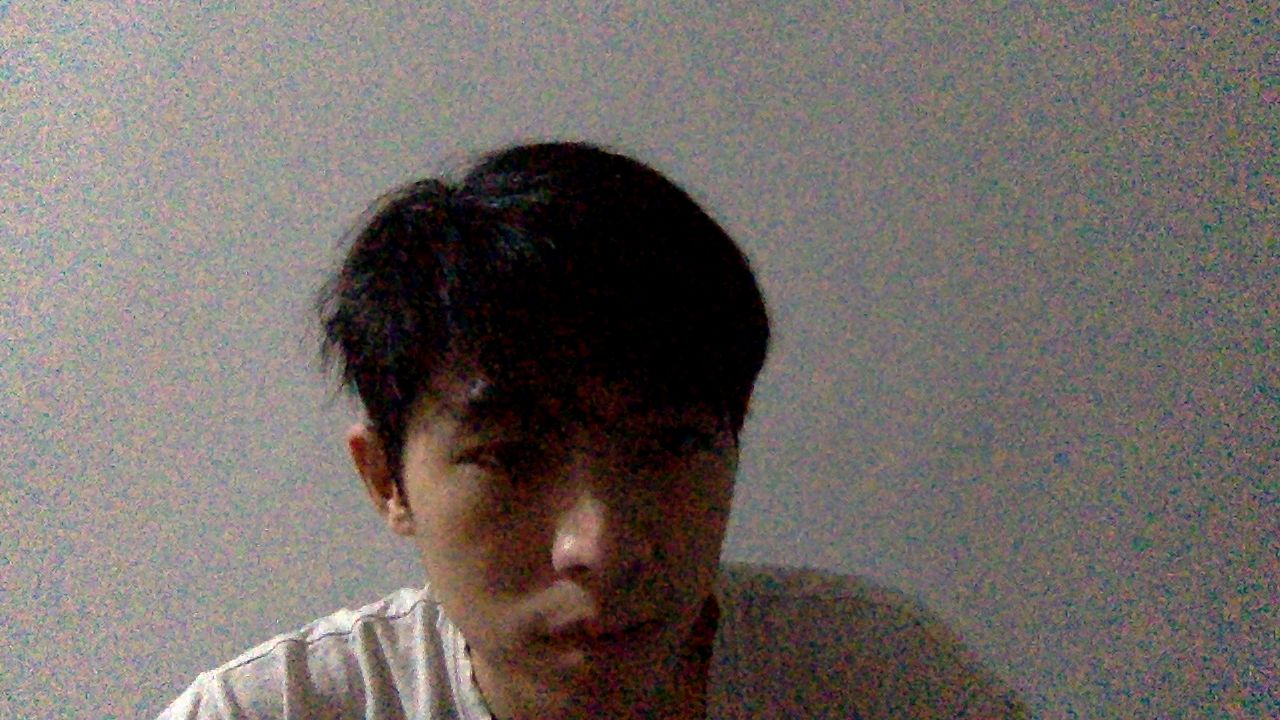

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#### Capture Video

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename='video.mp4'):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab, 
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;
      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has 
      // been successfully started. Since this is async, the function will be 
      // paused until this has started playing. 
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

In [ ]:
# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode

video_width = 300

video_path = record_video()
video_file = open(video_path, "r+b").read()

video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

Output hidden; open in https://colab.research.google.com to view.

### Test

In [ ]:
import cv2
import numpy as np 
from keras.models import load_model
import argparse
from PIL import Image
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

def mean_squared_loss(x1,x2):
    difference=x1-x2
    a,b,c,d,e=difference.shape
    n_samples=a*b*c*d*e
    sq_difference=difference**2
    Sum=sq_difference.sum()
    distance=np.sqrt(Sum)
    mean_distance=distance/n_samples

    return mean_distance


model=load_model("csae_model_new1.h5")

# cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture("Avenue_Dataset/testing_videos/20.avi")
cap = cv2.VideoCapture("video.mp4")
print(cap.isOpened())

while cap.isOpened():
    imagedump=[]
    ret,frame=cap.read()

    for i in range(10):
        ret,frame=cap.read()
        image = imutils.resize(frame,width=700,height=600)

        frame=cv2.resize(frame, (227,227), interpolation = cv2.INTER_AREA)
        gray=0.2989*frame[:,:,0]+0.5870*frame[:,:,1]+0.1140*frame[:,:,2]
        gray=(gray-gray.mean())/gray.std()
        gray=np.clip(gray,0,1)
        imagedump.append(gray)

    imagedump=np.array(imagedump)

    imagedump.resize(227,227,10)
    imagedump=np.expand_dims(imagedump,axis=0)
    imagedump=np.expand_dims(imagedump,axis=4)

    output=model.predict(imagedump)

    loss=mean_squared_loss(imagedump,output)
    print(loss)

    if frame.any()==None:
        print("none")

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
    if loss>0.00068:
        print('Abnormal Event Detected')
        cv2.putText(image,"Abnormal Event",(100,80),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),4)

    # cv2.imshow("video",image)
    cv2_imshow(image)
    clear_output(wait=True)

cap.release()
cv2.destroyAllWindows()

AttributeError: ignored